# International Space Station (ISS) Location Plotter

This project is implemented in python with the use of matplotlib, which is a plotting library.

The ISS is currently tracked by many organizations. We retrieve the information by scraping from the web page given below:
                              •http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html

The data from the Webpage is returned in a JSON format

The project makes use of the matplotlib which is a plotting library for Python along with the Basemap extension which adds geographical projections and some datasets to be able to plot coast lines, countries, and so on directly from the library. The Basemap has a few dependencies which need to installed in order to use it:
 
    1.	matplotlib 1.0.0 (or later)
    2.	Python 2.4 (or later, including Python 3)
    3.	NumPy 1.2.1 (or later): library which adds support for multi-   dimensional arrays and matrices, along with a large collection of  mathematical functions.
    4.	PROJ4: library for performing conversions between cartographic projections. 

There is also an optional library that is used in this project:
	
    Pillow: python imaging library.

The code snippet below just lets the output of the following code samples display inline on this page, at an appropriate size.

In [11]:
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)
import warnings; warnings.simplefilter('ignore')


We then import the required libraries using the code given below.

In [3]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

To fetch the data from the given APIs, we make use of urllib2.request which is an extensible library for opening URLs. The data is fetched from the URLS given below:

    1.	http://api.open-notify.org/astros.json, and 
    2.	http://api.open-notify.org/iss-now.json

The results(JSON) of: 
    

are then stored in two variables using 
    json.loads(response.read()) 

which are then used to display the data.

The fetched data is in JSON format. To make use of it in python, we have a JSON module which is imported using the import function

In [4]:
import json

The JSON retrieved is then stored in two variables which are then used to display the data.

In [5]:
import urllib.request
url_PeopleOnIss = 'http://api.open-notify.org/astros.json'
response=urllib.request.urlopen(url_PeopleOnIss)
result = json.loads(response.read())

The structure of the first returned JSON is:
{"number": no.,
 "message": "success", 
 "people": [
            {"name": "Name1", "craft": "ISS"}, 
            {"name": "Name2", "craft": "ISS"}, 
            {"name": "Name3", "craft": "ISS"}
            .
            .
            .
            ]
}

The structure of the second returned JSON is:
{
  "message": "success", 
  "timestamp": UNIX_TIME_STAMP, 
  "iss_position":{
   			"latitude": CURRENT_LATITUDE, 
   			"longitude": CURRENT_LONGITUDE
  		    }
}


The names of the people on board the ISS are then retrieved using:

In [6]:
print("Number of people on board the ISS:",result['number'])
astronaut_names=result['people']
for names in astronaut_names:
    print(names)

Number of people on board the ISS: 6
{'name': 'Anton Shkaplerov', 'craft': 'ISS'}
{'name': 'Scott Tingle', 'craft': 'ISS'}
{'name': 'Norishige Kanai', 'craft': 'ISS'}
{'name': 'Oleg Artemyev', 'craft': 'ISS'}
{'name': 'Andrew Feustel', 'craft': 'ISS'}
{'name': 'Richard Arnold', 'craft': 'ISS'}


In [ ]:
and the current position is retrieved using:

In [7]:
url_ISSLocation = 'http://api.open-notify.org/iss-now.json'
response=urllib.request.urlopen(url_ISSLocation)
result = json.loads(response.read())
location_ISS = result['iss_position']
latitude = float(location_ISS['latitude'])
longitude = float(location_ISS['longitude'])

To draw the map, we define the map and its attributes using:

In [8]:
my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,resolution='l', area_thresh=1000.0)

To display additional information on the map and plot the current location of the ISS, we store it's latitude and longitude in x and y. We also label the map and marker using:

<function matplotlib.pyplot.show>

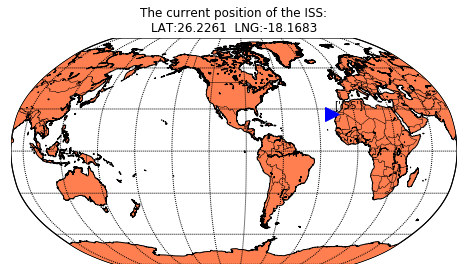

In [21]:
my_map.drawcoastlines()              #draws the coastlines
my_map.drawcountries()               #draws all the countries
my_map.fillcontinents(color='coral') #fills all the continents with the color coral
my_map.drawmapboundary()             #draws a clearer map boundary
my_map.drawmeridians(np.arange(0, 360, 30))  #draws the meridians
my_map.drawparallels(np.arange(-90, 90, 30)) #draws the longitude lines
x,y = my_map(longitude,latitude)
my_map.plot(x, y, 'b>', markersize=14)
label = ['ISS']
plt.text(x+100000, y+500000, label)
title_string = "The current position of the ISS:\n"
title_string += "LAT:%s  LNG:%s" % (latitude, longitude)
plt.title(title_string)
plt.show

Alternatively, the second parameter in my_map.plot specifies the marker and its shape.
To change the marker shape we can set it to: <br>
"."	point<br>
","	pixel<br>
"o"	circle<br>
"v"	triangle_down<br>
"^"	triangle_up<br>
"<"	triangle_left<br>
">"	triangle_right<br>
"1"	tri_down<br>
"2"	tri_up<br>
"3"	tri_left<br>
"4"	tri_right<br>
"8"	octagon<br>
"s"	square<br>
"p"	pentagon<br>
"P"	plus (filled)<br>
"*"	star<br>
"h"	hexagon1<br>
"H"	hexagon2<br>
"+"	plus<br>
"x"	x<br>
"X"	x (filled)<br>
"D"	diamond<br>
"d"	thin_diamond<br>
"|"	vline<br>
"_"	hline<br>
TICKLEFT	tickleft<br>
TICKRIGHT	tickright<br>
TICKUP	tickup<br>
TICKDOWN	tickdown<br>
CARETLEFT	caretleft (centered at tip)<br>
CARETRIGHT	caretright (centered at tip)<br>
CARETUP	caretup (centered at tip)<br>
CARETDOWN	caretdown (centered at tip)<br>
CARETLEFTBASE	caretleft (centered at base)<br>
CARETRIGHTBASE	caretright (centered at base)<br>
CARETUPBASE	caretup (centered at base)<br>
"None", " " or ""	nothing<br>
'$...$'	render the string using mathtext.<br>

For this project, a blue triangle_right marker is used.

#References
Plotting data on a map.(n.d.). Retrieved from https://matplotlib.org/basemap/users/examples.html<br>
Matplot User Guide.(n.d.). Retrieved from https://matplotlib.org/users/index.html<br>
Requests library.(n.d.). Retrieved from https://docs.python.org/2/library/urllib2.html<br>
OSGeo4W.(n.d.). Retrieved from https://trac.osgeo.org/osgeo4w/<br>
